# Diamond Price Prediction

## Introduction

In this task, we will predict the price of diamonds based on the features and analyze diamonds by their cut, color, clarity, price, and other attributes.



#### Dataset Source
The diamonds.csv dataset used in this notebook was sourced from Kaggle (Agrawal, 2017). 

This dataset contains multiple specifications of a collection of unidentified diamonds, such as carat, cut and color.

#### Dataset Description
The Diamonds dataset provides information on the factors influencing diamond pricing, including carat, cut, color, clarity, depth, length, width, height, and price. These features collectively determine the market price of diamonds seen online and in stores. The dataset is suitable for predictive modeling of diamond prices using multiple linear regression.

Accurately predicting diamond prices, given the numerous influencing factors, has significant implications for businesses, diamond mining companies, and consumers. A reliable price prediction tool would be invaluable to this community.

In [1]:
# Libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn import metrics
from scipy.stats import randint, uniform


In [2]:
df = pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/train.csv')
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


The Diamonds dataset consists of 9 features and 53,941 observations. For the purposes of analysis, a random subset of 1,000 observations will be investigated from the full dataset Below, a sample of 5 unique rows from this random subset is provided.

These features are sufficient to conduct predictive modeling of diamond prices using multiple linear regression.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.drop('Id',axis=1,inplace = True)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [7]:
df['volume'] = df['x']*df['y']*df['z']
df.drop(df[df['volume'] == 0].index, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200


In [8]:
df.drop(columns=['x','y','z'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43135 entries, 0 to 43151
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43135 non-null  float64
 1   cut      43135 non-null  object 
 2   color    43135 non-null  object 
 3   clarity  43135 non-null  object 
 4   depth    43135 non-null  float64
 5   table    43135 non-null  float64
 6   price    43135 non-null  int64  
 7   volume   43135 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.0+ MB


In [10]:
numerical_df = df.select_dtypes(include=['float64','int64'])
corr_matrix = numerical_df.corr()
corr_matrix

,carat,depth,table,price,volume
carat,1.000000,0.023989,0.182861,0.921872,0.973293
depth,0.023989,1.000000,-0.302684,-0.013225,0.004406
table,0.182861,-0.302684,1.000000,0.128571,0.168188
price,0.921872,-0.013225,0.128571,1.000000,0.899816
volume,0.973293,0.004406,0.168188,0.899816,1.000000


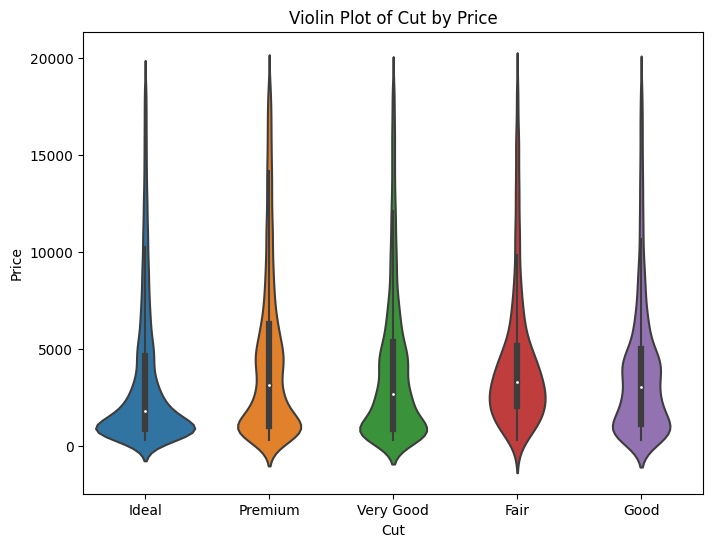

In [11]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='cut', y='price', data=df)
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Violin Plot of Cut by Price')
plt.show()

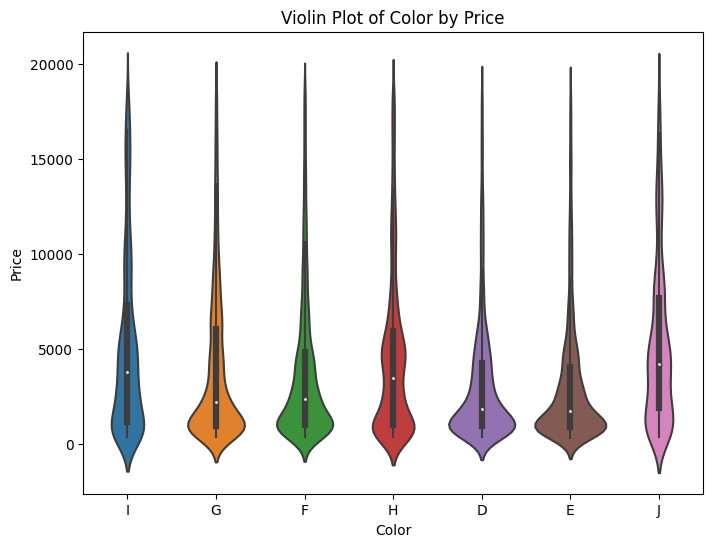

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='color', y='price', data=df)
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Violin Plot of Color by Price')
plt.show()

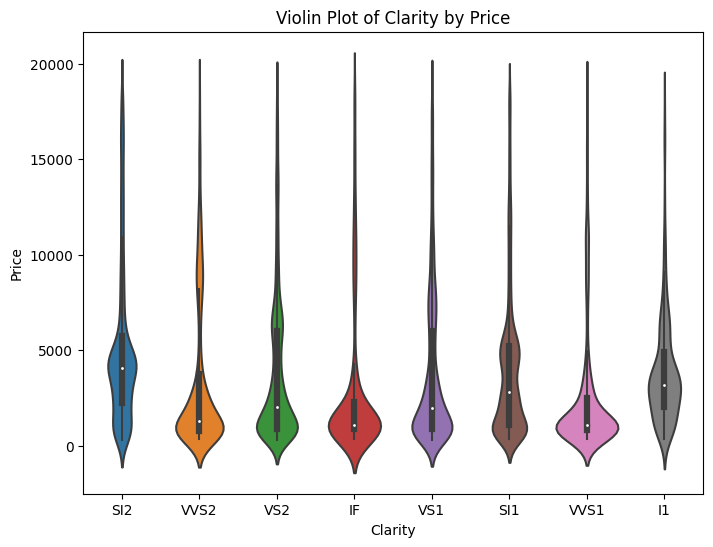

In [13]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='clarity', y='price', data=df)
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.title('Violin Plot of Clarity by Price')
plt.show()

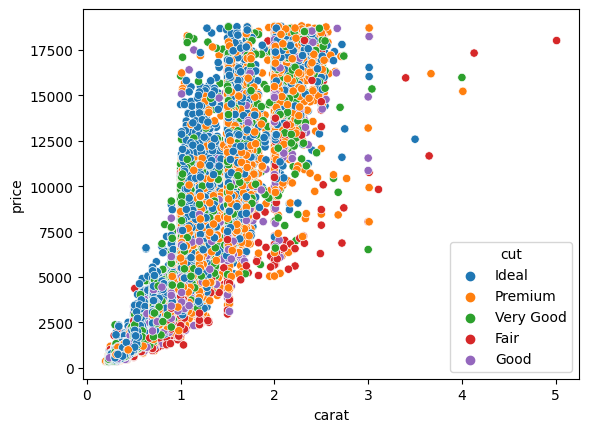

In [14]:
sns.scatterplot(x='carat', y='price', data=df,hue='cut')
plt.show()

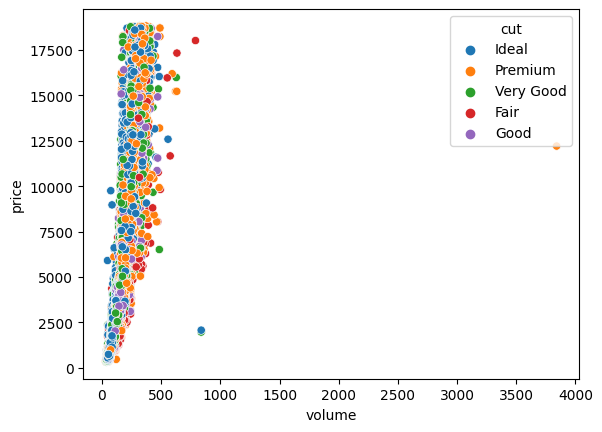

In [15]:
sns.scatterplot(x='volume', y='price', data=df,hue='cut')
plt.show()

# A lot of Outliers

In [16]:
# Make copy to avoid changing original data 
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in ['cut', 'color','clarity']:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.06,2,5,3,61.8,57.0,4270,176.483340
1,1.51,3,3,7,60.9,58.0,15164,246.965796
2,0.32,2,2,5,61.3,56.0,828,52.943373
3,0.53,2,3,5,61.2,56.0,1577,86.422842
4,0.70,3,4,7,61.0,57.0,2596,115.315200


In [17]:
label_data.describe()

,carat,cut,color,clarity,depth,table,price,volume
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.797578,2.555164,2.593972,3.831645,61.747386,57.457925,3927.668691,129.903731
std,0.473325,1.027043,1.701973,1.724911,1.435091,2.233401,3983.324154,78.594608
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,31.707984
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,947.000000,65.164320
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,114.846336
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5311.000000,170.846550
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,3840.598060


In [18]:
non_cat_columns = ['carat','depth','table','volume','price']

In [19]:
Q1 = label_data[non_cat_columns].quantile(0.25)
Q3 = label_data[non_cat_columns].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers for numerical columns
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Create a boolean mask for outliers for numerical columns
outliers_mask = ((label_data[non_cat_columns] < (Q1 - 1.5 * IQR)) | (label_data[non_cat_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
label_data = label_data[~outliers_mask]

label_data.describe()

,carat,cut,color,clarity,depth,table,price,volume
count,37990.000000,37990.000000,37990.000000,37990.000000,37990.000000,37990.000000,37990.000000,37990.000000
mean,0.708007,2.626797,2.536325,3.883285,61.785654,57.262322,3102.591182,115.381397
std,0.370525,0.945635,1.685407,1.730800,1.104684,2.023330,2742.931182,59.828613
min,0.200000,0.000000,0.000000,0.000000,58.800000,52.000000,326.000000,31.707984
25%,0.380000,2.000000,1.000000,2.000000,61.100000,56.000000,886.000000,61.588170
50%,0.600000,2.000000,3.000000,4.000000,61.900000,57.000000,2057.000000,99.028267
75%,1.010000,3.000000,4.000000,5.000000,62.500000,59.000000,4620.000000,163.428804
max,2.000000,4.000000,6.000000,7.000000,64.700000,63.500000,11856.000000,329.048384


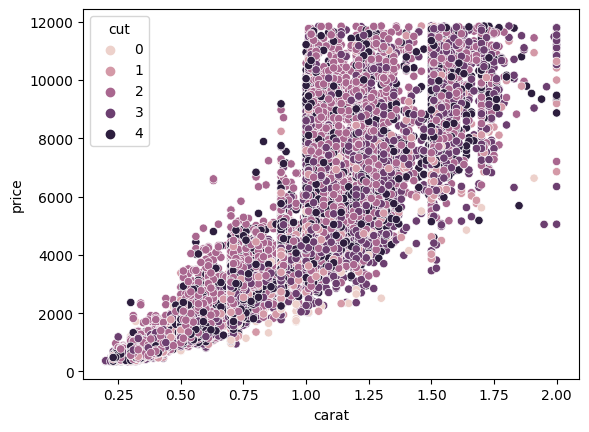

In [20]:
sns.scatterplot(x='carat', y='price', data=label_data,hue='cut')
plt.show()

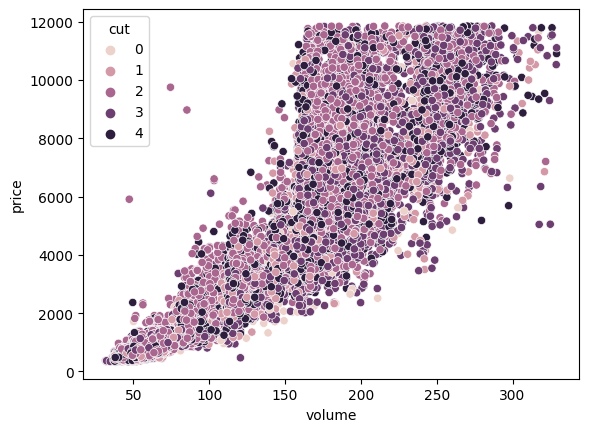

In [21]:
sns.scatterplot(x='volume', y='price', data=label_data,hue='cut')
plt.show()

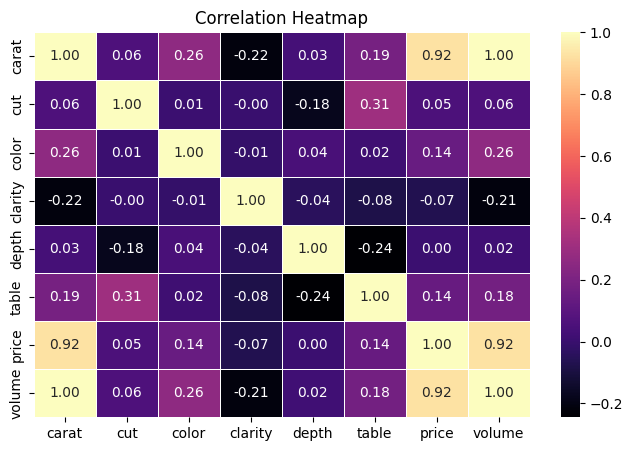

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(label_data.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [24]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])




# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [25]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -927.136822 
DecisionTree: -488.938807 
RandomForest: -371.904058 
KNeighbors: -578.998361 


In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor())
])

# Define hyperparameters grid for tuning
params = {
    'xgb__learning_rate': [0.001,0.01, 0.05, 0.1],
    'xgb__n_estimators': range(100, 1000, 100),
    'xgb__max_depth': range(3, 10),
    'xgb__min_child_weight': range(1, 10),
    'xgb__gamma': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'xgb__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
    'xgb__reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=100, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mean Absolute Error: 207.75744858960852


In [27]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [28]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
r2Score = r2_score(y_test, y_pred)
print("Train Mean Absolute Error:",train_mae)
print("Test Mean Absolute Error:",test_mae)
print("R2 Score:",r2Score)

Train Mean Absolute Error: 175.25622690016846
Test Mean Absolute Error: 207.75744858960852
R2 Score: 0.9822763370219778


In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 367.20742468824244


In [30]:
test=pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/test.csv')
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [31]:
ID=test['Id']
ID

0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10788, dtype: int64

In [32]:
# Make copy to avoid changing original data 
label_test = test.copy()

for col in ['cut', 'color','clarity']:
    label_test[col] = label_encoder.fit_transform(label_test[col])
    
    
label_test['volume'] = label_test['x'] * label_test['y'] * label_test['z']

label_test.drop(columns=['x','y','z'], inplace = True)
    
label_test.head()

,Id,carat,cut,color,clarity,depth,table,volume
0,1,0.34,2,3,7,61.1,57.0,55.686400
1,2,0.71,3,1,5,62.7,58.0,116.719456
2,3,0.44,4,5,4,62.8,56.0,71.889720
3,4,0.81,3,1,3,60.1,59.0,134.037855
4,5,0.40,2,3,6,61.2,56.0,66.435840


In [33]:
price=best_model.predict(label_test.drop('Id',axis=1))
data={'ID':ID,'price':price}
sub=pd.DataFrame(data)
sub.to_csv('sub_xgb2.csv',index=False)